In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('framingham.csv')
df.shape

(4238, 16)

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

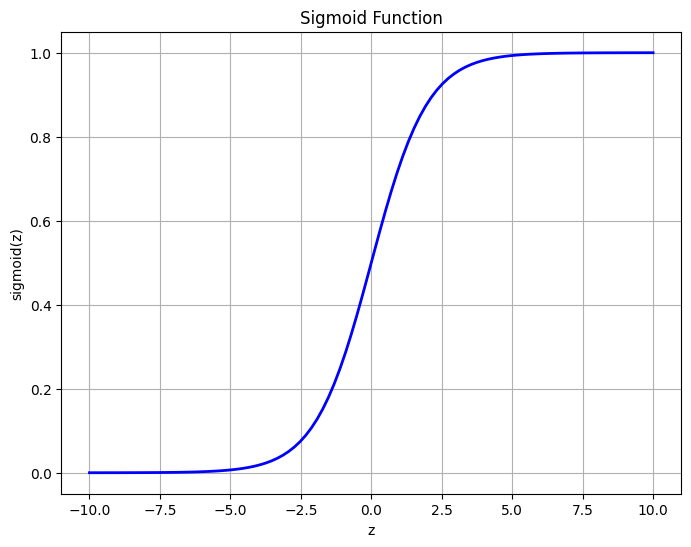

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

z = np.linspace(-10, 10, 100)
y = sigmoid(z)
plt.figure(figsize=(8, 6))
plt.plot(z, y, 'b-', linewidth=2)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

In [9]:
categorical_cols = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
target_col = 'TenYearCHD'

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")
print(f"Target column: {target_col}")

Categorical columns: ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
Numerical columns: ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Target column: TenYearCHD


In [10]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

male: [1 0]
education: [ 4.  2.  1.  3. nan]
currentSmoker: [0 1]
BPMeds: [ 0.  1. nan]
prevalentStroke: [0 1]
prevalentHyp: [0 1]
diabetes: [0 1]


In [13]:
df_processed = df.copy()

numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df_processed[numerical_cols] = numerical_imputer.fit_transform(df_processed[numerical_cols])
df_processed[categorical_cols] = categorical_imputer.fit_transform(df_processed[categorical_cols])

df_processed.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [14]:
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])

df_processed.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,3,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,1,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,2,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,2,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [15]:
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

df_processed[numerical_cols].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03
mean,1.307747e-16,-4.945968e-17,-7.963846e-17,-4.510052e-16,2.984347e-16,5.314819e-16,-1.173619e-16,1.768812e-16
std,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00,1.000118e+00
min,-2.051644e+00,-7.513222e-01,-2.926062e+00,-2.216987e+00,-2.929899e+00,-2.520588e+00,-2.651309e+00,-1.819727e+00
25%,-8.849392e-01,-7.513222e-01,-6.924178e-01,-6.967125e-01,-6.627903e-01,-6.682630e-01,-6.552620e-01,-4.200576e-01
50%,-6.824590e-02,-7.513222e-01,-6.068012e-02,-1.975180e-01,-7.502146e-02,-9.831699e-02,-7.308163e-02,-1.576196e-01
75%,7.484475e-01,9.292096e-01,5.710575e-01,5.285832e-01,5.862185e-01,5.496281e-01,5.922673e-01,1.485580e-01
max,2.381834e+00,5.130539e+00,1.036299e+01,7.381163e+00,5.004980e+00,7.615608e+00,5.582384e+00,1.366411e+01


In [16]:
X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

X.shape, y.shape

((4238, 15), (4238,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Training target distribution: {y_train.value_counts()}")
print(f"Testing target distribution: {y_test.value_counts()}")

Training set size: (3390, 15)
Testing set size: (848, 15)
Training target distribution: TenYearCHD
0    2875
1     515
Name: count, dtype: int64
Testing target distribution: TenYearCHD
0    719
1    129
Name: count, dtype: int64


In [18]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

log_reg

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_train_pred = log_reg.predict(X_train)
y_train_pred_proba = log_reg.predict_proba(X_train)[:, 1]

y_train_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accuracy

0.8572271386430679

In [21]:
y_test_pred = log_reg.predict(X_test)
y_test_pred_proba = log_reg.predict_proba(X_test)[:, 1]

y_test_pred[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [22]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accuracy

0.8490566037735849

In [23]:
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92       719\n           1       0.53      0.07      0.12       129\n\n    accuracy                           0.85       848\n   macro avg       0.69      0.53      0.52       848\nweighted avg       0.81      0.85      0.80       848\n'

In [24]:
roc_auc = roc_auc_score(y_test, y_test_pred_proba)
roc_auc

0.6995827538247567

In [25]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[711,   8],
       [120,   9]])

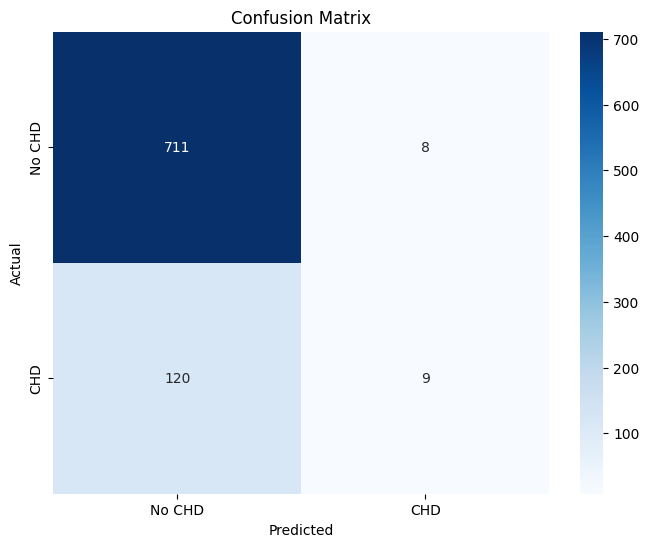

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CHD', 'CHD'], 
            yticklabels=['No CHD', 'CHD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

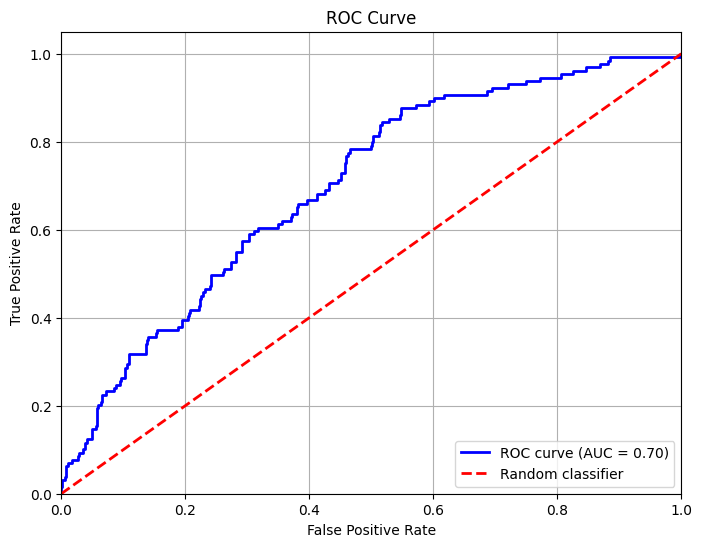

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [28]:
feature_names = X.columns
coefficients = log_reg.coef_[0]

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

feature_importance

,Feature,Coefficient,Abs_Coefficient
6,prevalentStroke,0.844817,0.844817
1,age,0.573018,0.573018
0,male,0.452388,0.452388
5,BPMeds,0.340608,0.340608
10,sysBP,0.323508,0.323508
4,cigsPerDay,0.313987,0.313987
7,prevalentHyp,0.175686,0.175686
14,glucose,0.163620,0.163620
8,diabetes,0.131236,0.131236
9,totChol,0.099272,0.099272


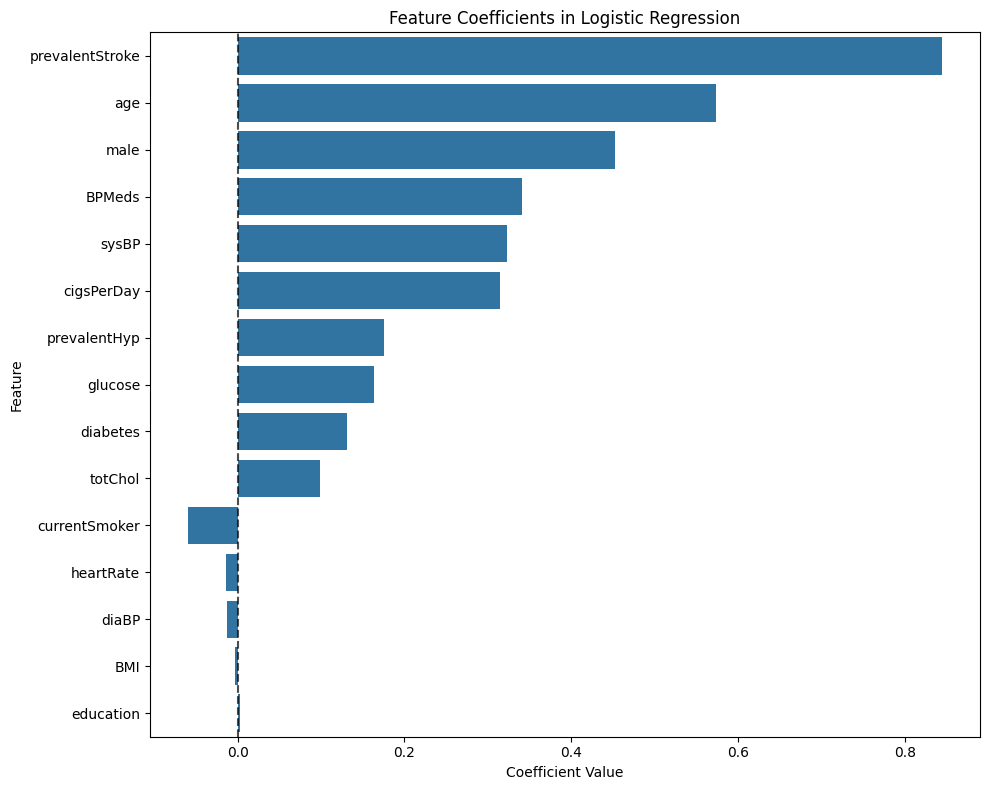

In [29]:
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
plt.title('Feature Coefficients in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

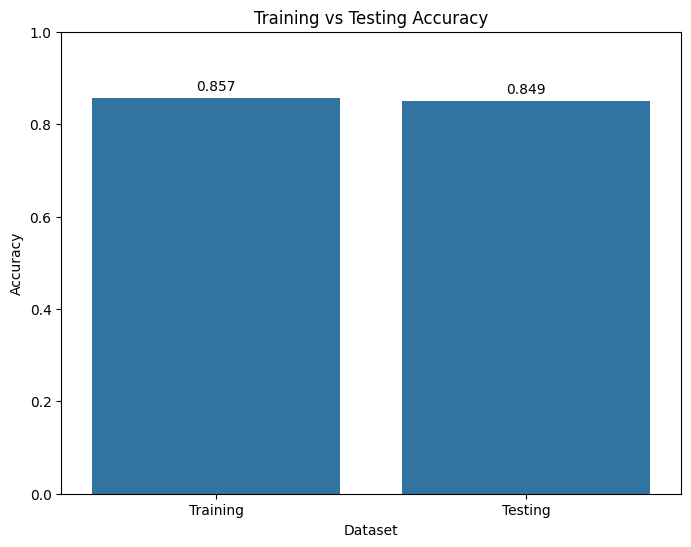

In [30]:
accuracy_comparison = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_accuracy, test_accuracy]
})

plt.figure(figsize=(8, 6))
sns.barplot(data=accuracy_comparison, x='Dataset', y='Accuracy')
plt.title('Training vs Testing Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracy_comparison['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')
plt.show()

In [31]:
performance_summary = {
    'Training Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy,
    'ROC AUC Score': roc_auc,
    'True Negatives': cm[0,0],
    'False Positives': cm[0,1],
    'False Negatives': cm[1,0],
    'True Positives': cm[1,1]
}

performance_df = pd.DataFrame(list(performance_summary.items()), columns=['Metric', 'Value'])
performance_df

,Metric,Value
0,Training Accuracy,0.857227
1,Test Accuracy,0.849057
2,ROC AUC Score,0.699583
3,True Negatives,711.000000
4,False Positives,8.000000
5,False Negatives,120.000000
6,True Positives,9.000000
